In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import random
import cv2                
import matplotlib.pyplot as plt   
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image                  
from tqdm import tqdm
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import ImageFile
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from extract_bottleneck_features import *
from keras.models import load_model

ImageFile.LOAD_TRUNCATED_IMAGES = True  
%matplotlib inline

Using TensorFlow backend.


In [30]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

In [31]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [32]:
# define ResNet50 model
Resnet50_model = ResNet50(weights='imagenet')

In [33]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [34]:
def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(Resnet50_model.predict(img))

In [35]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [36]:
ResNet50_model = load_model('saved_models/optimum_Resnet50_dog_breed.h5')

In [37]:
def ResNet50_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = ResNet50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [38]:
### To get the comparison photo of human in dog images
import glob
from os.path import abspath

my_path = abspath("")
dir_list = glob.glob(my_path + "/dogImages/train/*")
img_list = []
for dir_i in dir_list:
    tmp = glob.glob(dir_i + "/*")
    img_list.append(tmp[0])

In [39]:
# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob.glob("dogImages/train/*/"))]

In [40]:
dog_dict = {}
for i in range(len(dog_names)):
    dog_dict[dog_names[i]] = img_list[i]

In [41]:
def spirit_dog(human_path,dog_path):
    
    img1 = cv2.imread(human_path)
    img2 = cv2.imread(dog_path)
    plt.figure(1)
    # convert BGR image to RGB for plotting
    cv_rgb_human = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    cv_rgb_dog = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # display the image
    plt.subplot(121)
    plt.title("Human")
    plt.axis("off")
    plt.imshow(cv_rgb_human)
    plt.subplot(122)
    plt.title("Spirit Dog")
    plt.axis("off")
    plt.imshow(cv_rgb_dog)
    plt.show()

In [42]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def check_img(file_path):
    if dog_detector((file_path)):
        print("Image of dog is detected")
        img = cv2.imread(file_path)
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # display the image, along with bounding box
        plt.imshow(cv_rgb)
        plt.axis('off')
        plt.show()
        print("Uno Momento.... while we check the speices")
        print("This looks like mmmm... {}".format(ResNet50_predict_breed(file_path)))
        print("")
    elif face_detector((file_path)):
        print("hmmm.. You look more like a Hooman....")
        dog_spec = ResNet50_predict_breed(file_path)
        print("No Worries, {} looks like you spirit dog " .format(dog_spec))
        print("Picture is better than a thousand words")
        spirit_dog(file_path,dog_dict[dog_spec])
        print("")
    else:
        print("Snap... Currently we support only dogs and humans")
        img = cv2.imread(file_path)
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # display the image, along with bounding box
        plt.imshow(cv_rgb)
        plt.axis("off")
        plt.show()
        print("")
    return

hmmm.. You look more like a Hooman....
94552064/94653016 [============================>.] - ETA: 0sNo Worries, Chinese_crested looks like you spirit dog 
Picture is better than a thousand words


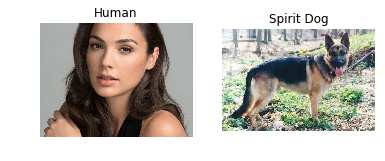


Image of dog is detected


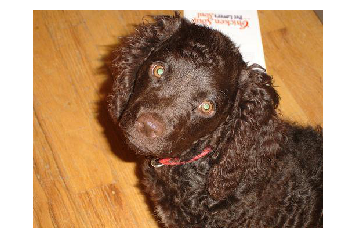

Uno Momento.... while we check the speices
This looks like mmmm... American_water_spaniel

Image of dog is detected


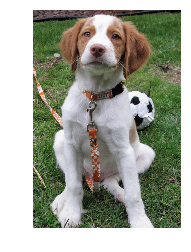

Uno Momento.... while we check the speices
This looks like mmmm... Brittany

Image of dog is detected


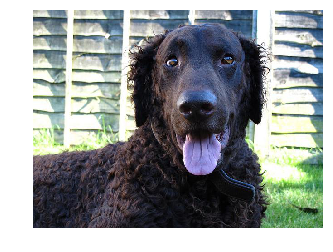

Uno Momento.... while we check the speices
This looks like mmmm... Curly-coated_retriever

Image of dog is detected


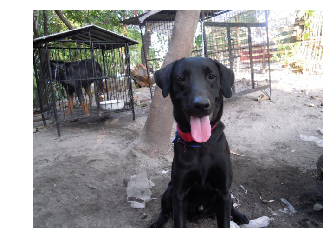

Uno Momento.... while we check the speices
This looks like mmmm... Labrador_retriever

Image of dog is detected


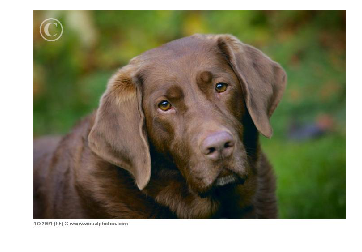

Uno Momento.... while we check the speices
This looks like mmmm... Chesapeake_bay_retriever

Image of dog is detected


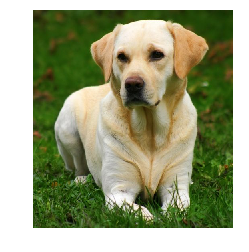

Uno Momento.... while we check the speices
This looks like mmmm... Labrador_retriever

Image of dog is detected


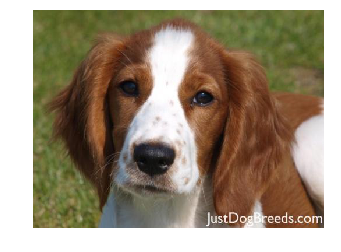

Uno Momento.... while we check the speices
This looks like mmmm... Welsh_springer_spaniel

Snap... Currently we support only dogs and humans


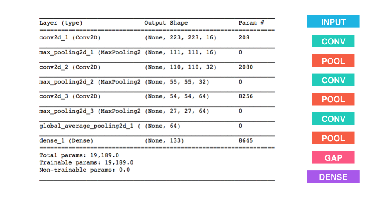


Snap... Currently we support only dogs and humans


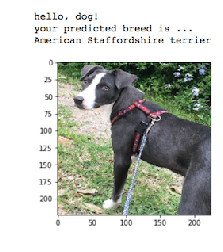


hmmm.. You look more like a Hooman....
No Worries, English_toy_spaniel looks like you spirit dog 
Picture is better than a thousand words


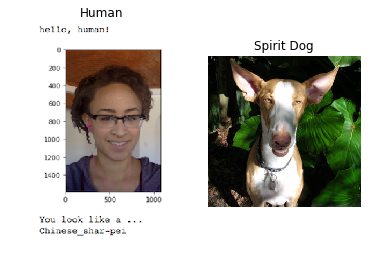

In [43]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
sample_images = np.array(sorted(glob.glob("./images/*")))
for i in range(len(sample_images)):
    check_img(sample_images[i])